In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
train=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
len(train.data),len(train.targets),len(test.data),len(test.targets)

(60000, 60000, 10000, 10000)

In [ ]:
image,label=train[100]
image.shape,label

(torch.Size([1, 28, 28]), 8)

In [ ]:
classes=train.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classes_id=train.class_to_idx
classes_id

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Text(0.5, 1.0, '8')

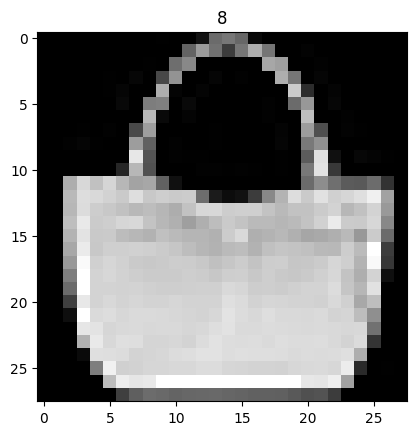

In [ ]:
plt.imshow(image.squeeze(),cmap='grey')
plt.title(label)

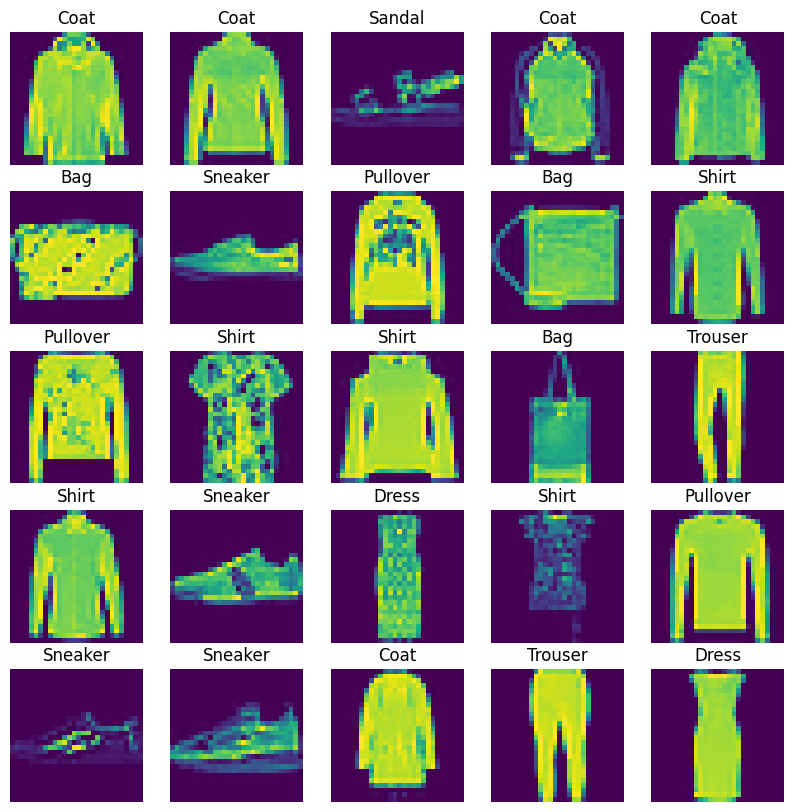

In [ ]:
torch.manual_seed(69)
fig=plt.figure(figsize=(10,10))
r,c=5,5
for i in range(1,r*c+1):
  random_id=torch.randint(0,len(train),size=(1,)).item()
  img,label=train[random_id]
  fig.add_subplot(r,c,i)
  plt.imshow(img.squeeze())
  plt.title(classes[label])
  plt.axis('off')

In [ ]:
BATCH=32
training=DataLoader(train,batch_size=BATCH,shuffle=True)
testing=DataLoader(test,batch_size=BATCH,shuffle=True)

In [ ]:
len(training),len(testing)

(1875, 313)

Model 1

In [ ]:
class Model1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(hidden_units,output_shape)
    )
  def forward(self,x):
    return self.layer(x)

In [ ]:
model1=Model1(28*28,15,len(classes))

In [ ]:
loss_fn=nn.CrossEntropyLoss()
opt=torch.optim.SGD(params=model1.parameters(),lr=0.001)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(420)
epochs=5
for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch,(X,y) in enumerate(training):
    model1.train()
    y_pred=model1(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    opt.zero_grad()
    loss.backward()
    opt.step()

    if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(training.dataset)} samples")
  train_loss/=len(training)
  test_loss=0
  correct = 0
  total = 0
  model1.eval()
  with torch.inference_mode():
    for X,y in testing:
      test_pred=model1(X)
      test_loss+=loss_fn(test_pred,y).item()
  test_loss/=313
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | \n")

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.50683 | Test loss: 0.53335 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.50232 | Test loss: 0.52857 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.49797 | Test loss: 0.52445 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.49408 | Test loss: 0.52174 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.49023 | Test loss: 0.51842 | 



CNN

In [ ]:
class Model1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.layer2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )
  def forward(self,x):
    return self.classifier(self.layer2(self.layer1(x)))

In [ ]:
model2=Model1(input_shape=1,hidden_units=10,output_shape=len(classes))

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optim=torch.optim.SGD(params=model2.parameters(),lr=0.01)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(420)
epochs=10
for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch,(X,y) in enumerate(training):
    model2.train()
    y_pred=model1(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    opt.zero_grad()
    loss.backward()
    opt.step()

    if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(training.dataset)} samples")
  train_loss/=len(training)
  test_loss=0
  correct = 0
  total = 0
  model2.eval()
  with torch.inference_mode():
    for X,y in testing:
      test_pred=model1(X)
      test_loss+=loss_fn(test_pred,y).item()
  test_loss/=313
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | \n")

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.46542 | Test loss: 0.49689 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.46339 | Test loss: 0.49435 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.46126 | Test loss: 0.49259 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45941 | Test loss: 0.49126 | 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45741 | Test loss: 0.48970 | 

Looked at 0/60000 samples
Looked at 1280

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth
